Lab 2
- Carlos Jarrin
- Fausto Yugcha

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data = pd.read_csv ("/content/drive/MyDrive/NLP/datos/train.tsv", sep = '\t')

In [3]:
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


array([[<Axes: title={'center': 'Sentiment'}>]], dtype=object)

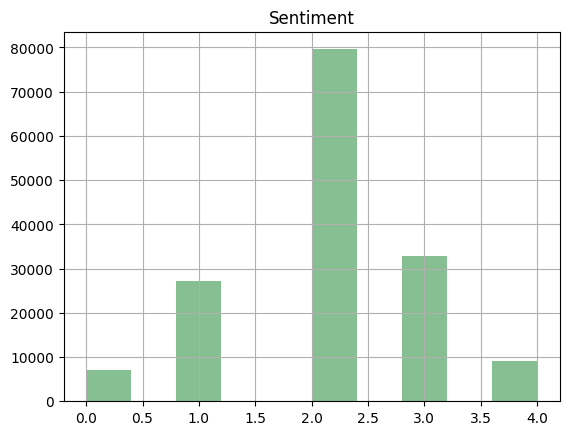

In [4]:
data.hist(column='Sentiment', color='#86bf91')

In [5]:
df_0 = data.loc[(data['Sentiment'] == 0)]
df_1 = data.loc[(data['Sentiment'] == 1)]
df_2 = data.loc[(data['Sentiment'] == 2)]
df_3 = data.loc[(data['Sentiment'] == 3)]
df_4 = data.loc[(data['Sentiment'] == 4)]

In [6]:
def df_to_text(dataframe):
  text = []
  for index, row in dataframe.iterrows():
    text.append(row['Phrase'])
  texto = ' '.join(text)
  return texto

In [7]:
df_0.head()

,PhraseId,SentenceId,Phrase,Sentiment
101,102,3,would have a hard time sitting through this one,0
103,104,3,have a hard time sitting through this one,0
157,158,5,Aggressive self-glorification and a manipulati...,0
159,160,5,self-glorification and a manipulative whitewash,0
201,202,7,Trouble Every Day is a plodding mess .,0


In [ ]:
texto_0 = df_to_text(df_0)
texto_1 = df_to_text(df_1)
texto_2 = df_to_text(df_2)
texto_3 = df_to_text(df_3)
texto_4 = df_to_text(df_4)

In [ ]:
texto_0

"would have a hard time sitting through this one have a hard time sitting through this one Aggressive self-glorification and a manipulative whitewash self-glorification and a manipulative whitewash Trouble Every Day is a plodding mess . is a plodding mess plodding mess could hate it for the same reason hate it hate is Oedekerk 's realization of his childhood dream to be in a martial-arts flick , and proves that sometimes the dreams of youth should remain just that baseball movies that try too hard to be mythic Hampered -- no , paralyzed -- by a self-indulgent script ... that aims for poetry and ends up sounding like satire . a self-indulgent script There 's very little sense to what 's going on here , avoid almost feels as if the movie is more interested in entertaining itself than in amusing us . The movie 's progression into rambling incoherence gives new meaning to the phrase ` fatal script error . ' The movie 's progression into rambling incoherence gives new meaning to the phrase 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Filtro de stopword y puntuación
def remover(texto):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(texto)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  filtered_sentence = []

  for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  s = ' '.join(filtered_sentence)
  s = s.translate(str.maketrans('', '', string.punctuation))
  return s

In [ ]:
texto0 = remover(texto_0)
texto1 = remover(texto_1)
texto2 = remover(texto_2)
texto3 = remover(texto_3)
texto4 = remover(texto_4)

In [ ]:
textos = [texto0, texto1, texto2, texto3, texto4]

## 1.	Do a quick EDA that highlights some of the common texts used for each type of review

In [ ]:
def contador(texto, k):
  from collections import Counter
  words = texto.split()
  wordCount = Counter(words)
  split_it = texto.split()
  Counter = Counter(split_it)
  most_occur = Counter.most_common(k)
  return most_occur

In [ ]:
for index, texto in enumerate(textos):
  a = contador(texto, 10)
  print(index, a)

0 [('s', 1136), ('movie', 757), ('film', 477), ('nt', 424), ('bad', 417), ('The', 345), ('like', 311), ('one', 268), ('I', 255), ('A', 208)]
1 [('s', 3506), ('nt', 1520), ('movie', 1365), ('film', 1260), ('The', 1033), ('like', 855), ('one', 670), ('much', 589), ('story', 508), ('RRB', 498)]
2 [('s', 7001), ('film', 2131), ('movie', 1868), ('The', 1845), ('nt', 1281), ('one', 1209), ('RRB', 1112), ('like', 1047), ('story', 900), ('LRB', 878)]
3 [('s', 3999), ('film', 1828), ('movie', 1273), ('The', 1067), ('A', 903), ('good', 845), ('one', 767), ('story', 660), ('funny', 620), ('nt', 614)]
4 [('s', 1329), ('film', 930), ('movie', 564), ('A', 520), ('one', 439), ('The', 372), ('best', 364), ('funny', 341), ('good', 281), ('performances', 253)]


Puntuacion | Palabras clave | Intuición
--- | --- | ---
0 | bad | mala
1 | story | neutral
2 | story, RRB | neutral
3 | good, funny | buena
4 | best, funny, good | muy buena

## 2.	Tokenize all the movie review texts

In [ ]:
#Tokenization por palabras
word_tokens_0 = word_tokenize(texto_0)
word_tokens_1 = word_tokenize(texto_1)
word_tokens_2 = word_tokenize(texto_2)
word_tokens_3 = word_tokenize(texto_3)
word_tokens_4 = word_tokenize(texto_4)

In [ ]:
print(word_tokens_0[:15])
print(word_tokens_4[:15])

['would', 'have', 'a', 'hard', 'time', 'sitting', 'through', 'this', 'one', 'have', 'a', 'hard', 'time', 'sitting', 'through']
['This', 'quiet', ',', 'introspective', 'and', 'entertaining', 'independent', 'is', 'worth', 'seeking', '.', 'quiet', ',', 'introspective', 'and']


In [ ]:
#Tokenization por oraciones
from nltk.tokenize import sent_tokenize
Oracion_0 = sent_tokenize(texto_0)
print(Oracion_0[:3])

['would have a hard time sitting through this one have a hard time sitting through this one Aggressive self-glorification and a manipulative whitewash self-glorification and a manipulative whitewash Trouble Every Day is a plodding mess .', "is a plodding mess plodding mess could hate it for the same reason hate it hate is Oedekerk 's realization of his childhood dream to be in a martial-arts flick , and proves that sometimes the dreams of youth should remain just that baseball movies that try too hard to be mythic Hampered -- no , paralyzed -- by a self-indulgent script ... that aims for poetry and ends up sounding like satire .", "a self-indulgent script There 's very little sense to what 's going on here , avoid almost feels as if the movie is more interested in entertaining itself than in amusing us ."]


## 3.	Create a numerical feature vector for each document (Bag of words)

In [ ]:
Texto_pto_0 = [texto_0]

In [ ]:
vocab = set()

bow_model = []

for text in Texto_pto_0:
    word_counts = {}
    tokens = nltk.word_tokenize(text)
    vocab.update(tokens)

    for word in tokens:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    bow_model.append(word_counts)

In [ ]:
print(vocab)

print(bow_model[0])

{'high-minded', 'Further', 'blah', 'notorious', 'overused', 'well', 'imaginary', 'galled', 'flimsier', 'court', 'apparatus', 'recommended', 'absolutely', 'Nijinsky', 'lost', 'meaningless', 'ragged', 'low', 'exercise', 'aspect', 'stuffing', 'adolescent', 'latest', 'bit', 'unbelievably', 'register', '20', 'proving', 'baseball', 'Consider', 'edited', 'f', 'succumbs', 'Pictures', 'concepts', 'look', 'dreaded', 'imitations', 'illustrates', 'boy', 'IMAX', 'Gangster', 'moviegoers', 'Scorsese', 'dearth', 'set', 'psychology', 'victims', 'paradigm', 'unbearable', 'rubbish', 'bowel', 'raunch-fests', 'Kaige', 'corner', 'Girls', 'bloodsucker', 'headaches', 'farcical', 'keg', 'vs.', 'hugely', 'Shoe', 'underrehearsed', 'teams', 'remarkable', 'bother', 'weepy', 'overly-familiar', 'bottomlessly', 'artistically', 'agonizing', 'undeserved', 'Worthless', 'keeps', 'baaaaaaaaad', 'inadequately', 'vital', 'balance', 'receiving', 'simplistic', 'opaque', 'pell-mell', 'unimaginative', 'idiots', 'Wood', 'subtler

## 4.	Define the probability model for each of the 5 classes

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# y 'Text' es la columna de texto que se quiere vectorizar
df2 = pd.DataFrame({'Text': ['sample text1'], 'Sentiment': [0]})

# Vectorización del texto usando CountVectorizer
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df2['Text'])

# Definir la variable objetivo
y = df_0['Sentiment']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'somewhat negative', 'neutral', 'somewhat neutral', 'positive'])

# Mostrar la precisión
print(f'Accuracy: {accuracy:.4f}')

# Mostrar el reporte de clasificación
print('\nClassification Report:')
print(report)

# Visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'somewhat negative', 'neutral', 'somewhat neutral', 'positive'],
            yticklabels=['negative', 'somewhat negative', 'neutral', 'somewhat neutral', 'positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## 5.	Train and evaluate the model

In [ ]:
# Inicializar y entrenar el modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'somewhat negative', 'neutral', 'somewhat neutral', 'positive'])

# Mostrar la precisión
print(f'Accuracy: {accuracy:.4f}')

# Mostrar el reporte de clasificación
print('\nClassification Report:')
print(report)

# Crear un DataFrame con los textos de prueba, sus etiquetas reales y predicciones
# Utilizando el index de X_test para ubicar los textos originales
test_texts = df.iloc[y_test.index]
test_texts['Predicted'] = y_pred

# Mostrar los textos utilizados en testing con sus predicciones
print('\nTesting Texts with Predictions:')
print(test_texts[['Text', 'Sentiment', 'Predicted']])

# Visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'somewhat negative', 'neutral', 'somewhat neutral', 'positive'],
            yticklabels=['negative', 'somewhat negative', 'neutral', 'somewhat neutral', 'positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## 6.	Make adjustments to your BoW:
*   remove stop words
*   case folding
*   stemming
*   lemmatization
*   instead of using a 0/1 (binary) vector, use the number of times that a word occurs in the text


In [ ]:
#remove stop words
def remover_stop_words(texto):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(texto)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  filtered_sentence = []

  for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  s = ' '.join(filtered_sentence)
  return s

In [ ]:
remover_stop_words(texto_0)

"would hard time sitting one hard time sitting one Aggressive self-glorification manipulative whitewash self-glorification manipulative whitewash Trouble Every Day plodding mess . plodding mess plodding mess could hate reason hate hate Oedekerk 's realization childhood dream martial-arts flick , proves sometimes dreams youth remain baseball movies try hard mythic Hampered -- , paralyzed -- self-indulgent script ... aims poetry ends sounding like satire . self-indulgent script There 's little sense 's going , avoid almost feels movie interested entertaining amusing us . The movie 's progression rambling incoherence gives new meaning phrase ` fatal script error . ' The movie 's progression rambling incoherence gives new meaning phrase ` fatal script error . ' ` fatal script error fatal script error Tartakovsky 's team freakish powers visual charm , five writers slip modern rut narrative banality . narrative banality bad 'm sure filmmaker would disagree , , honestly , I n't see point hone

In [ ]:
#case folding
cf_text = texto_0.casefold()
cf_text

"would have a hard time sitting through this one have a hard time sitting through this one aggressive self-glorification and a manipulative whitewash self-glorification and a manipulative whitewash trouble every day is a plodding mess . is a plodding mess plodding mess could hate it for the same reason hate it hate is oedekerk 's realization of his childhood dream to be in a martial-arts flick , and proves that sometimes the dreams of youth should remain just that baseball movies that try too hard to be mythic hampered -- no , paralyzed -- by a self-indulgent script ... that aims for poetry and ends up sounding like satire . a self-indulgent script there 's very little sense to what 's going on here , avoid almost feels as if the movie is more interested in entertaining itself than in amusing us . the movie 's progression into rambling incoherence gives new meaning to the phrase ` fatal script error . ' the movie 's progression into rambling incoherence gives new meaning to the phrase 

In [ ]:
#stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from functools import reduce

ps = PorterStemmer()

words = word_tokenize(texto_0)

stemmed_texto = reduce(lambda x, y: x + " " + ps.stem(y), words, "")
stemmed_texto


" would have a hard time sit through thi one have a hard time sit through thi one aggress self-glorif and a manipul whitewash self-glorif and a manipul whitewash troubl everi day is a plod mess . is a plod mess plod mess could hate it for the same reason hate it hate is oedekerk 's realiz of hi childhood dream to be in a martial-art flick , and prove that sometim the dream of youth should remain just that basebal movi that tri too hard to be mythic hamper -- no , paralyz -- by a self-indulg script ... that aim for poetri and end up sound like satir . a self-indulg script there 's veri littl sens to what 's go on here , avoid almost feel as if the movi is more interest in entertain itself than in amus us . the movi 's progress into rambl incoher give new mean to the phrase ` fatal script error . ' the movi 's progress into rambl incoher give new mean to the phrase ` fatal script error . ' ` fatal script error fatal script error tartakovski 's team ha some freakish power of visual charm 

In [ ]:
#lemmatization

import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(texto_0)
lemmatized_tokens = [token.lemma_ for token in doc]
lemmatized_text = ' '.join(lemmatized_tokens)

lemmatized_text

"would have a hard time sit through this one have a hard time sit through this one aggressive self - glorification and a manipulative whitewash self - glorification and a manipulative whitewash trouble every day be a plod mess . be a plod mess plod mess could hate it for the same reason hate it hate be Oedekerk 's realization of his childhood dream to be in a martial - art flick , and prove that sometimes the dream of youth should remain just that baseball movie that try too hard to be mythic Hampered -- no , paralyzed -- by a self - indulgent script ... that aim for poetry and end up sound like satire . a self - indulgent script there be very little sense to what be go on here , avoid almost feel as if the movie be more interested in entertain itself than in amusing we . the movie 's progression into ramble incoherence give new meaning to the phrase ` fatal script error . ' the movie 's progression into ramble incoherence give new meaning to the phrase ` fatal script error . ' ` fatal

In [ ]:
import collections
import re

l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", texto_0.lower()).split()
l_doc2 = re.sub(r"[^a-zA-Z0-9]", " ", texto_1.lower()).split()
l_doc3 = re.sub(r"[^a-zA-Z0-9]", " ", texto_2.lower()).split()

wordset12 = np.union1d(l_doc1,l_doc2)
wordset =  np.union1d(wordset12,l_doc3)
print(wordset)

['000' '1' '10' ... 'zucker' 'zwick' 'zzzzzzzzz']


In [ ]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [ ]:
bow1 = calculateBOW(wordset,l_doc1)
#bow2 = calculateBOW(wordset,l_doc2)
#bow3 = calculateBOW(wordset,l_doc3)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,000,1,10,100,101,102,103,104,105,10th,...,ziyi,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,2,2,30,5,5,2,1,2,7,0,...,0,2,4,6,2,0,0,0,0,5


# 7.	How does these techniques affect your models?

Las técnicas de preprocesamiento como stemming o stopwords ayudan a reducir el vector de palabras.


Bibliografía:

*   https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
*   https://spotintelligence.com/2022/12/20/bag-of-words-python/#Bag-of-words_Python_code
*   https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-bag-of-words-with-python-example/

